In [285]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

In [286]:
data = pd.read_csv("steamdata_clean.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25306 entries, 0 to 25305
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                25306 non-null  object 
 1   steam_appid         25306 non-null  int64  
 2   controller_support  25306 non-null  int64  
 3   dlc                 25306 non-null  int64  
 4   short_description   25292 non-null  object 
 5   demos               25306 non-null  int64  
 6   platforms           25306 non-null  object 
 7   movies              25306 non-null  int64  
 8   achievements        25306 non-null  int64  
 9   release_date        25306 non-null  object 
 10  genres              25306 non-null  object 
 11  categories          25306 non-null  object 
 12  developer           25306 non-null  object 
 13  publisher           25306 non-null  object 
 14  owners              25306 non-null  object 
 15  average_forever     25306 non-null  int64  
 16  medi

In [287]:
# fill null with blank descriptions
data["short_description"] = data["short_description"].fillna("")

<AxesSubplot:xlabel='tags_count', ylabel='tags'>

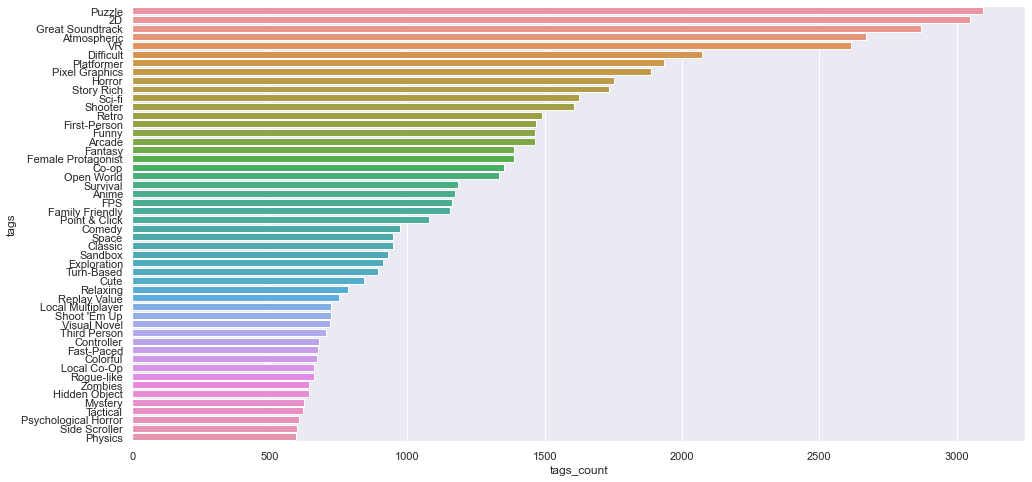

In [76]:
tags_count = pd.DataFrame(data.additional_tags.str.split(';').explode().value_counts()).reset_index()
tags_count.columns = ["tags", "tags_count"]
tags_count = tags_count[(tags_count["tags"] != "Singleplayer") & (tags_count["tags"] != "Multiplayer") & (tags_count["tags"] != "NSFW")]
f = plt.figure(figsize=(16, 8))
sb.barplot(x = "tags_count", y = "tags", data = tags_count.head(50))

In [129]:
data[["name", "developer", "genres", "initialprice", "rating"]].sort_values("rating", ascending = False).head(20)

,name,developer,genres,initialprice,rating
23,Portal 2,Valve,Action;Adventure,9.99,98.6
7313,Factorio,Wube Software LTD.,Casual;Indie;Simulation;Strategy;Early Access,30.00,98.4
2256,One Finger Death Punch,Silver Dollar Games,Action;Casual;Indie,4.99,98.0
17,Portal,Valve,Action,9.99,97.8
4237,Finding Paradise,Freebird Games,Adventure;Indie;RPG,9.99,97.8
6886,TY the Tasmanian Tiger,Krome Studios,Action;Adventure;Indie,14.99,97.8
7145,OneShot,Little Cat Feet,Adventure;Casual;Indie,9.99,97.8
7249,Iron Snout,SnoutUp,Action;Free to Play;Indie,0.00,97.8
2015,A Hat in Time,Gears for Breakfast,Adventure;Indie,29.99,97.7
2981,RimWorld,Ludeon Studios,Indie;Simulation;Strategy,34.99,97.7


Taking a look at the top games, Action, Adventure, Indie seem to be common genres of top games

In [48]:
# we will only look at 'main' genres of games, since some titles on steam w/ genres eg. Photo Editing arent really games
genre_cols = ["Action",
            "Adventure",
            "Casual",
            "Indie",
            "Massively Multiplayer",
            "RPG",
            "Racing",
            "Simulation",
            "Sports",
            "Strategy"]

In [81]:
genre_encoding = data["genres"].str.get_dummies(';').filter(genre_cols)
genre_encoding

,Action,Adventure,Casual,Indie,Massively Multiplayer,RPG,Racing,Simulation,Sports,Strategy
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
25302,0,1,1,1,0,0,0,0,0,0
25303,1,1,0,1,0,0,0,0,0,0
25304,1,0,1,1,0,0,0,0,0,0
25305,0,1,1,1,0,0,0,0,0,0


<AxesSubplot:>

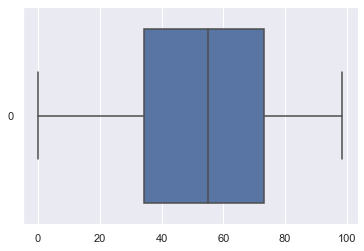

In [294]:
sb.boxplot(data = data["rating"], orient = "h")

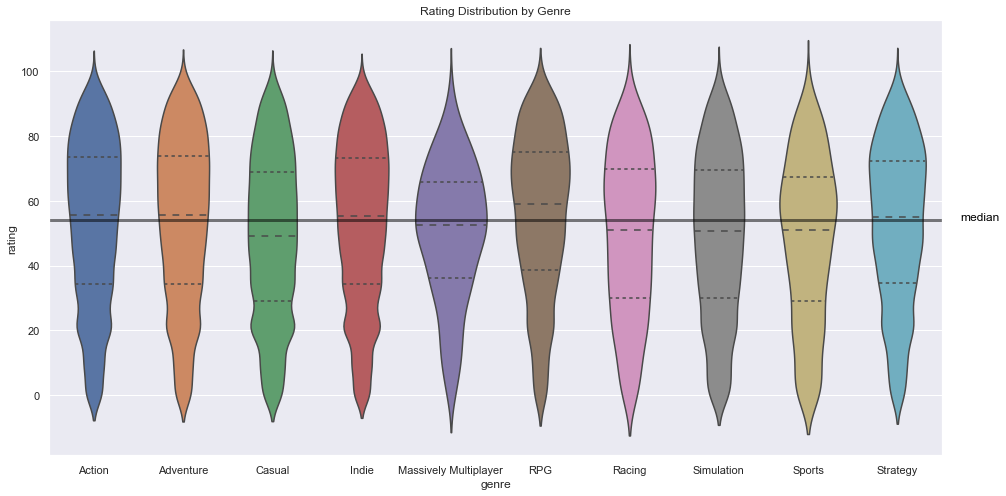

In [113]:
genres_df = data[["rating"]]
genres_df = pd.concat([genres_df, genre_encoding], axis = "columns")
genres_df

genres_data = pd.DataFrame()
# create new dataframe with each entry of genre to respective rating, as games can belong to multiple genres
for col in genre_cols:
    ratings = pd.DataFrame(genres_df.loc[genres_df[col] == 1, "rating"].values, columns = ["rating"])
    ratings["genre"] = col
    genres_data = pd.concat([genres_data, ratings], axis = 0)

fig, ax = plt.subplots(figsize=(16, 8))
sb.violinplot(x = "genre", y = "rating", data = genres_data, inner = "quartile", ax = ax)
ax.set_title("Rating Distribution by Genre")
ax.axhline(genres_data.rating.median(), color = "black", lw = 3, alpha = 0.5)
ax.text(9.7, genres_data.rating.median(), "median", color = 'black')
plt.show()

Not much variations in rating across genres, maybe because of how games can and often have multiple genres. eg. Action games usually come together with Adventure

- Massively Multiplayer games are mostly distributed around its median and tend to have much lower ratings than other genres 
- Racing, Simulation, Sports games have slightly lower ratings than most genres
- RPG games have much higher ratings than other genres
- Casual games have much lower ratings than other genres

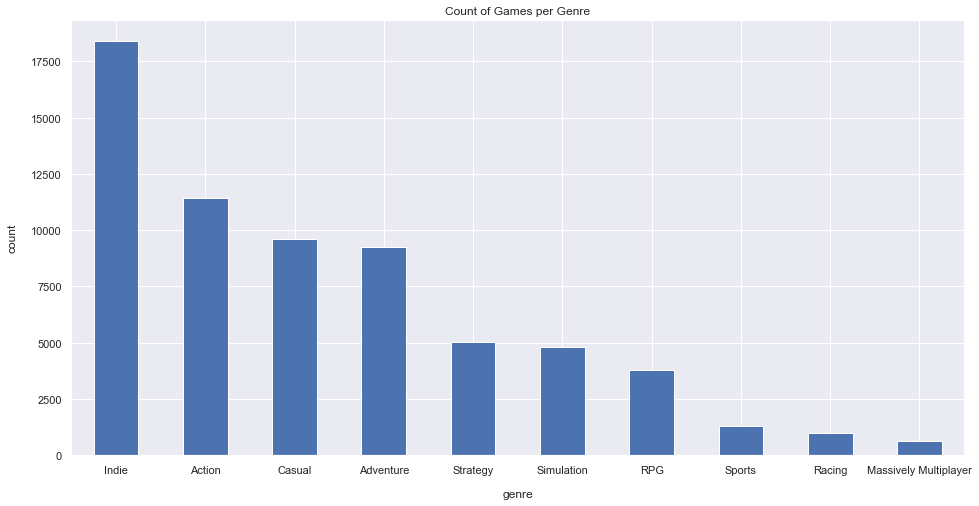

In [122]:
f = plt.figure(figsize=(16, 8))
genres_data["genre"].value_counts().plot(kind = "bar", rot = 0);
plt.xlabel("genre", labelpad=14)
plt.ylabel("count", labelpad=14)
plt.title("Count of Games per Genre");

- Massively Multiplayer games are fewest
- Very few Sports and Racing games
- A lot of Indie games aka games by non-AAA developers, meaning smaller development studios or solo-devs 

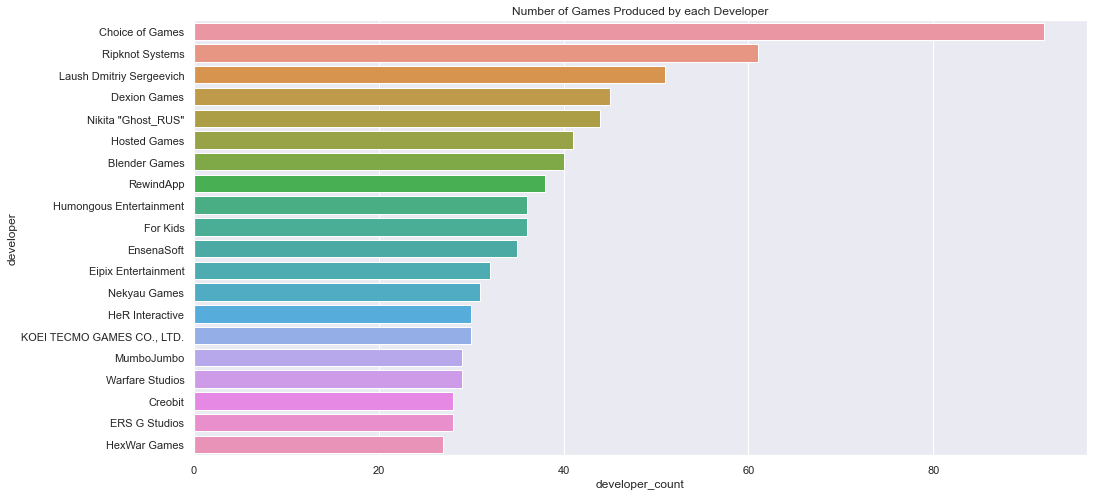

In [213]:
developer_count = pd.DataFrame(data.developer.str.split(';').explode().value_counts()).reset_index()
developer_count.columns = ["developer", "developer_count"]

f = plt.figure(figsize=(16, 8))
sb.barplot(x = "developer_count", y = "developer", data = developer_count.head(20))
plt.title("Number of Games Produced by each Developer");

In [179]:
# top developers, developers that produce the highest rated games
developer_df = pd.DataFrame(data.developer.apply(lambda x: x.split(';')))
developer_df = pd.concat([developer_df, data["rating"]], axis = "columns")
developer_df = developer_df.explode("developer")

developer_df.groupby(["developer"])["rating"].mean().sort_values(ascending = False).head(20)

developer
Wube Software LTD.                               98.4
Little Cat Feet                                  97.8
Ludeon Studios                                   97.7
Gears for Breakfast                              97.7
Steel Crate Games                                97.6
Tendershoot, Michael Lasch, ThatWhichIs Media    97.5
Sukeban Games                                    97.4
Team D-13                                        97.3
Hempuli Oy                                       97.1
My Dog Zorro                                     97.1
Vaka Game Magazine, Team Ladybug                 97.1
scriptwelder                                     97.1
OhNoo Studio, Smile                              97.0
Asymmetric                                       97.0
Re-Logic                                         97.0
Stellar Circle                                   97.0
Indefatigable                                    96.9
Askiisoft                                        96.9
Aldin Dynamics    

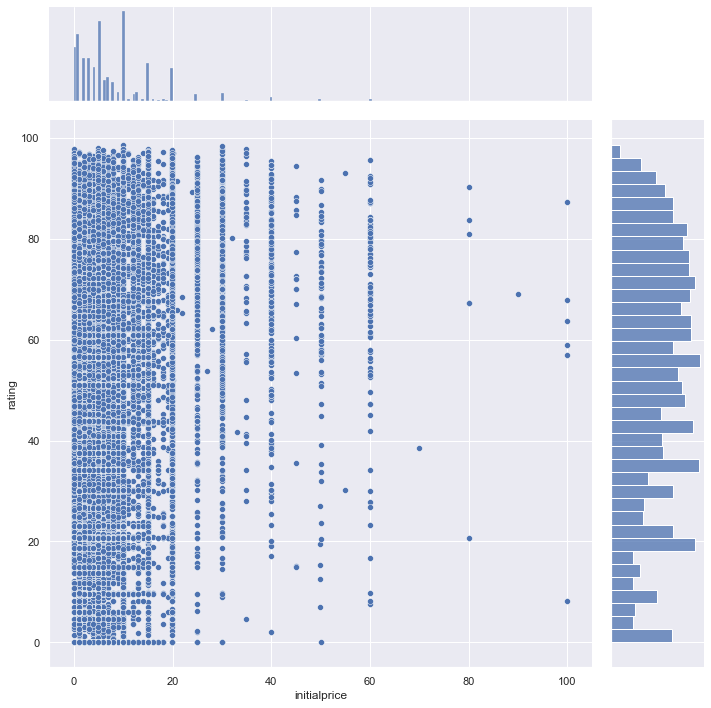

In [212]:
# there were 5 games that were >$199 ruining the scale LOL
price_df = pd.concat([data[data["initialprice"] < 199]["initialprice"], data["rating"]], axis = 1)
sb.jointplot(data = price_df, x = "initialprice", y = "rating", height = 10)

In [255]:
variables = data[["controller_support", "dlc", "demos", "movies", "achievements", "is_multiplayer", "rating"]].copy()

In [256]:
# platforms -> no. of platforms supported, languages -> no. of languages supported
variables["platforms"] = data["platforms"].apply(lambda x: len(x.split(';')))
variables["languages"] = data["languages"].apply(lambda x: len(x.split(';')))

<AxesSubplot:>

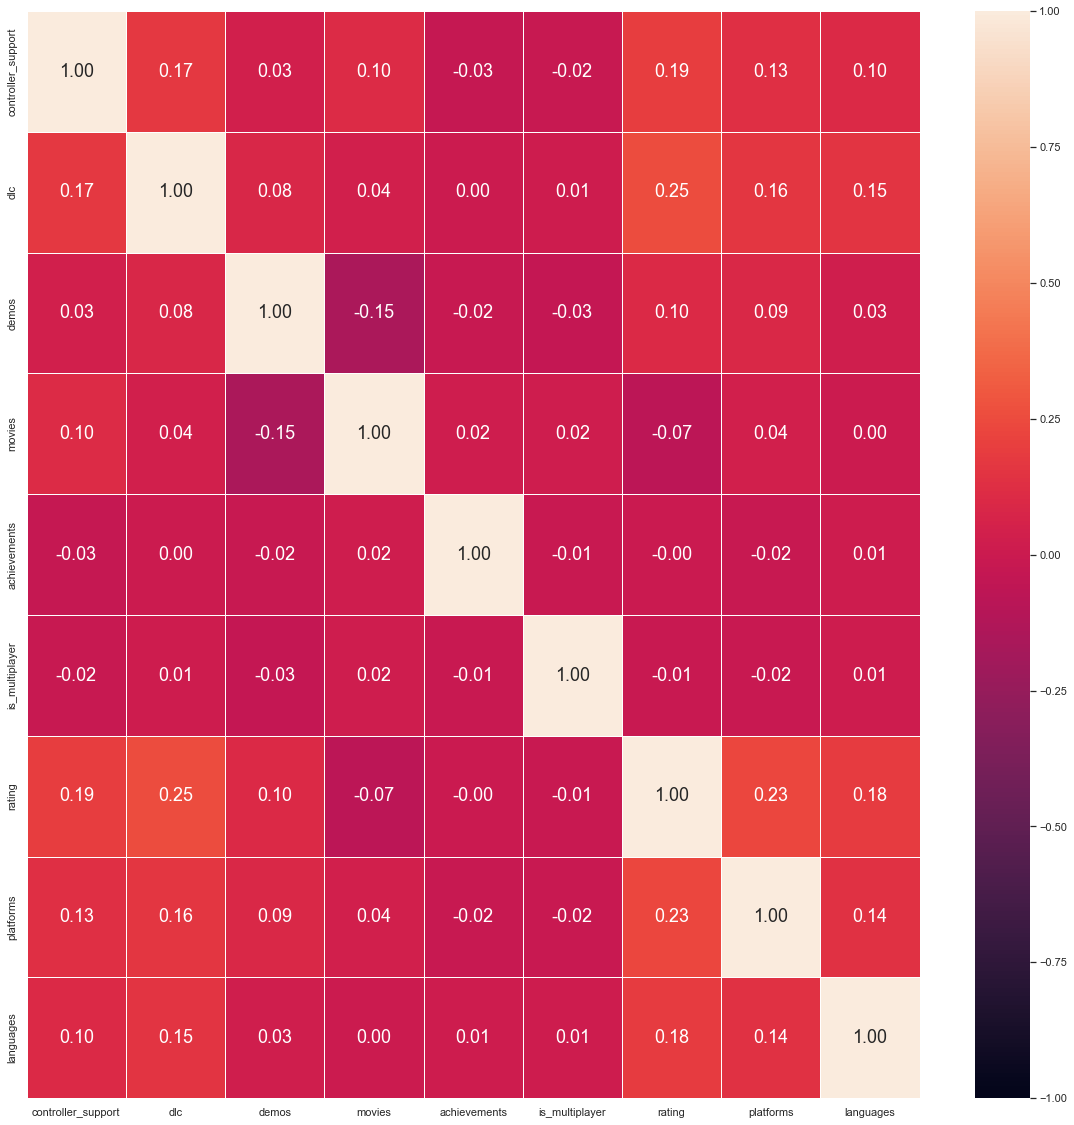

In [257]:
f = plt.figure(figsize=(20, 20))
sb.heatmap(variables.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "rocket")

controller support, DLC, demos, price, no. of languages, no. of platforms seem to be correlated with rating. surprisingly, whether a game is multiplayer or has achievements does not really affect rating

<AxesSubplot:>

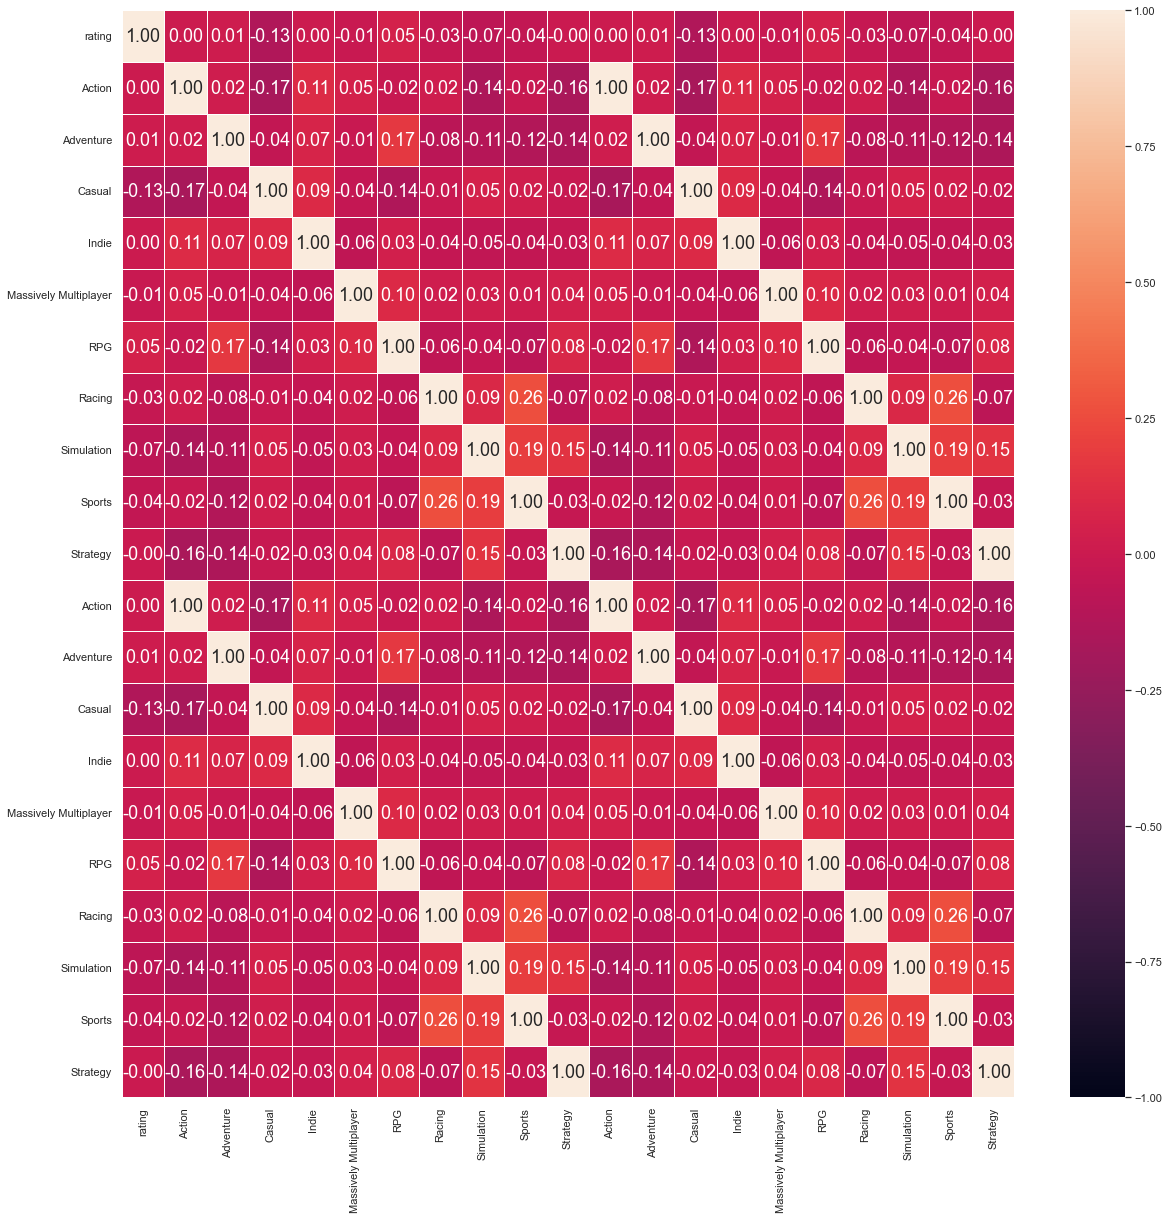

In [260]:
f = plt.figure(figsize=(20, 20))
sb.heatmap(genres_df.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "rocket")

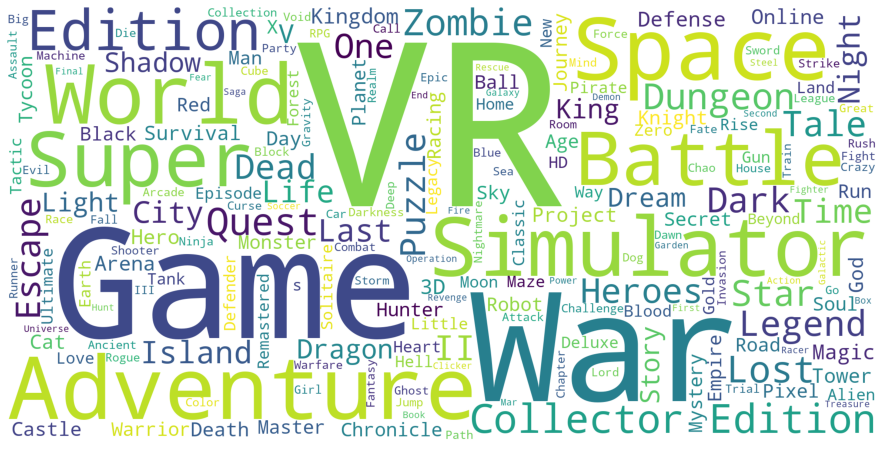

In [41]:
# fancy word clouds to see commonly used words in game titles and descriptions

from wordcloud import WordCloud, STOPWORDS

name_corpus = ' '.join(data["name"])
name_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', height = 1000, width = 2000).generate(name_corpus)
plt.figure(figsize=(16,8))
plt.imshow(name_wordcloud)
plt.axis('off')
plt.show()

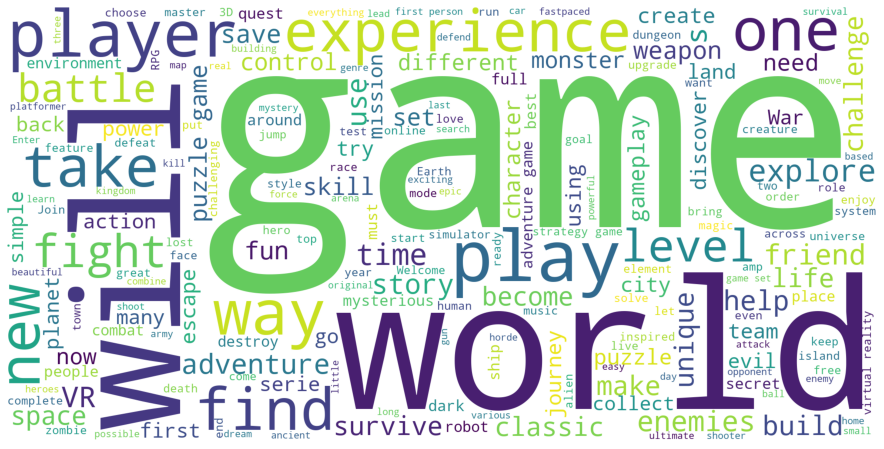

In [42]:
# TODO: clean the text data better
import re
import string

description_corpus = ' '.join(data["short_description"])
words = description_corpus.split()
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in words]
description_corpus = ' '.join(stripped)

description_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', height = 1000, width = 2000).generate(description_corpus)
plt.figure(figsize=(16,8))
plt.imshow(description_wordcloud)
plt.axis('off')
plt.show()